In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

In [2]:
file = "Resources/Flightlist_Concat.csv"

flights_df = pd.read_csv(file)
flights_df.head()

,Unnamed: 0,origin,destination,day,callsign
0,0,ZGSZ,KORD,2019-10-01 00:00:00+00:00,CHH705
1,1,LFPG,KORD,2019-10-01 00:00:00+00:00,AFR136
2,2,EDDF,KORD,2019-10-01 00:00:00+00:00,DLH432
3,3,NaN,KORD,2019-10-01 00:00:00+00:00,AZG788
4,4,EGLL,KORD,2019-10-01 00:00:00+00:00,BAW297


In [3]:
# pull in airbnb data csv
file2 = "Resources/airbnb_q419_to_q420.csv"

airbnb_data = pd.read_csv(file2)
airbnb_data.head()

,listing_id,date
0,2384,10/13/2019
1,2384,10/23/2019
2,2384,10/25/2019
3,2384,11/10/2019
4,2384,11/13/2019


In [4]:
# put long date into smaller date format in new column
flights_df["airline"] = flights_df["callsign"].str[:3]
flights_df['date'] = flights_df["day"].str[:10]
flights_df.head()

,Unnamed: 0,origin,destination,day,callsign,airline,date
0,0,ZGSZ,KORD,2019-10-01 00:00:00+00:00,CHH705,CHH,2019-10-01
1,1,LFPG,KORD,2019-10-01 00:00:00+00:00,AFR136,AFR,2019-10-01
2,2,EDDF,KORD,2019-10-01 00:00:00+00:00,DLH432,DLH,2019-10-01
3,3,NaN,KORD,2019-10-01 00:00:00+00:00,AZG788,AZG,2019-10-01
4,4,EGLL,KORD,2019-10-01 00:00:00+00:00,BAW297,BAW,2019-10-01


In [5]:
#put flight info in date time format
flights_df['date']= pd.to_datetime(flights_df["date"], format='%Y-%m-%d', errors='coerce')
flights_df['month']= pd.to_datetime(flights_df["date"], format='%Y-%m-%d', errors='coerce').dt.strftime('%m-%Y')
flights_df.head()

,Unnamed: 0,origin,destination,day,callsign,airline,date,month
0,0,ZGSZ,KORD,2019-10-01 00:00:00+00:00,CHH705,CHH,2019-10-01,10-2019
1,1,LFPG,KORD,2019-10-01 00:00:00+00:00,AFR136,AFR,2019-10-01,10-2019
2,2,EDDF,KORD,2019-10-01 00:00:00+00:00,DLH432,DLH,2019-10-01,10-2019
3,3,NaN,KORD,2019-10-01 00:00:00+00:00,AZG788,AZG,2019-10-01,10-2019
4,4,EGLL,KORD,2019-10-01 00:00:00+00:00,BAW297,BAW,2019-10-01,10-2019


In [6]:
airbnb_data['date']= pd.to_datetime(airbnb_data["date"], format='%m/%d/%Y', errors='coerce')
#airbnb_data['date']= pd.to_datetime(airbnb_data["date"], format='%m/%d/%Y', errors='coerce').dt.strftime('%m-%Y')
airbnb_data.head()

,listing_id,date
0,2384,2019-10-13
1,2384,2019-10-23
2,2384,2019-10-25
3,2384,2019-11-10
4,2384,2019-11-13


In [7]:
flights_df.dtypes

Unnamed: 0              int64
origin                 object
destination            object
day                    object
callsign               object
airline                object
date           datetime64[ns]
month                  object
dtype: object

In [8]:
#scatter plot
months = flights_df['month'].unique()
traffic_month = flights_df.groupby("month")
traffic_date = flights_df.groupby("date")
traffic_date.count()
#traffic_month.count()
#num_flights = sorted(traffic_month.count())
#months
#num_flights

,Unnamed: 0,origin,destination,day,callsign,airline,month
date,,,,,,,
2019-10-01,1587,1183,1587,1587,1587,1587,1587
2019-10-02,1539,1154,1539,1539,1539,1539,1539
2019-10-03,1644,1250,1644,1644,1644,1644,1644
2019-10-04,1580,1194,1580,1580,1580,1580,1580
2019-10-05,1426,1071,1426,1426,1426,1426,1426
...,...,...,...,...,...,...,...
2020-12-27,956,741,956,956,956,956,956
2020-12-28,944,744,944,944,944,944,944
2020-12-29,780,625,780,780,780,780,780


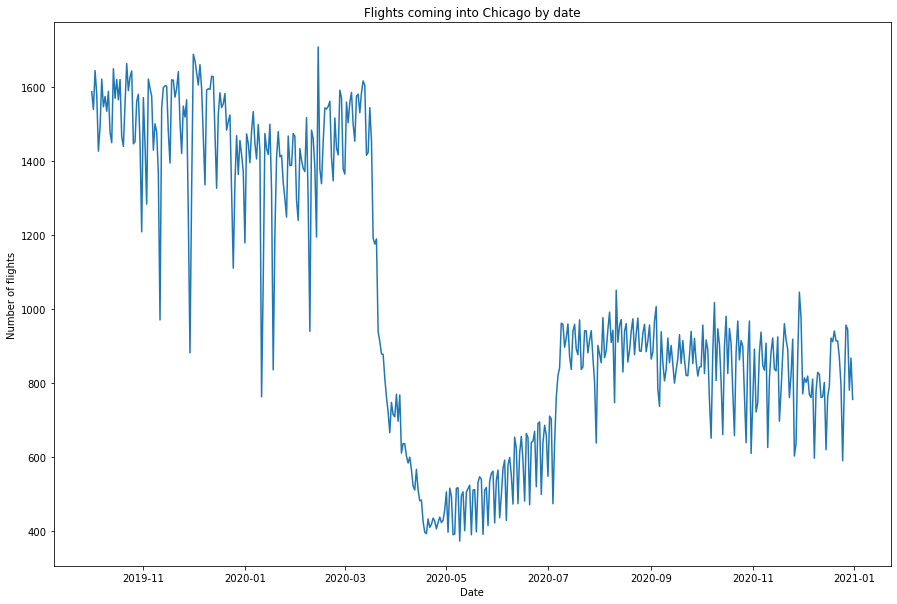

In [9]:
fig, ax = plt.subplots(figsize = (15,10))
#is the index set to date?
y_axis = flights_df.groupby('date')['destination'].count()
ax.plot(y_axis)
#add x axis and y axis
#x_axis = flights_df['date'].index.values
#y_axis = traffic_date['destination'].values
#ax.scatter(x_axis, y_axis, color="purple")
ax.set(xlabel="Date", ylabel="Number of flights", title="Flights coming into Chicago by date")
plt.show()

[Text(0, 0, '2019-10'),
 Text(1, 0, '2019-11'),
 Text(2, 0, '2019-12'),
 Text(3, 0, '2020-01'),
 Text(4, 0, '2020-02'),
 Text(5, 0, '2020-03'),
 Text(6, 0, '2020-04'),
 Text(7, 0, '2020-05'),
 Text(8, 0, '2020-06'),
 Text(9, 0, '2020-07'),
 Text(10, 0, '2020-08'),
 Text(11, 0, '2020-09'),
 Text(12, 0, '2020-10'),
 Text(13, 0, '2020-11'),
 Text(14, 0, '2020-12')]

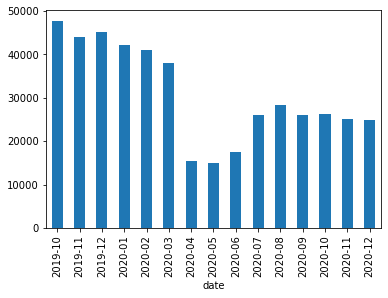

In [10]:
#flights_df.head()
plot_df = flights_df[['date', 'destination']]
s = plot_df.groupby(pd.Grouper(freq='M', key='date'))['destination'].count()
#print (s)
ax1 = s.plot(kind="bar")
ax1.set_xticklabels(s.index.strftime('%Y-%m'))
#plot_df.head()
#plot_df.set_index('date')
#plot_df.head()
#plot_df.loc[plot_df['date'], 'date'].dt.to_period('M').value_counts().plot(kind="bar")

In [11]:
plot2_df = airbnb_data
t = plot2_df.groupby(pd.Grouper(freq='M', key='date'))['listing_id'].count()
print(t)

date
2019-10-31    9925
2019-11-30    7060
2019-12-31    6486
2020-01-31    5452
2020-02-29    5760
2020-03-31    4664
2020-04-30    1013
2020-05-31    1529
2020-06-30    2636
2020-07-31    4688
2020-08-31    5116
2020-09-30    5269
2020-10-31    5393
2020-11-30    4136
2020-12-31    1228
Freq: M, Name: listing_id, dtype: int64


In [12]:
#merge the two together
merge_df = pd.DataFrame(columns = ['month','flight count', 'lodging count'])
test_df = flights_df.groupby(pd.Grouper(freq='M', key='date')).agg({'month':'count'})
test2_df = airbnb_data.groupby(pd.Grouper(freq='M', key='date')).agg({'listing_id':'count'})
#test_df
#for x in range(15):
merge_df['flight count'] = test_df['month']
merge_df['lodging count'] = test2_df['listing_id']
merge_df['month'] = months
merge_df

,month,flight count,lodging count
date,,,
2019-10-31,10-2019,47760,9925
2019-11-30,11-2019,44110,7060
2019-12-31,12-2019,45166,6486
2020-01-31,01-2020,42089,5452
2020-02-29,02-2020,41107,5760
2020-03-31,03-2020,38136,4664
2020-04-30,04-2020,15434,1013
2020-05-31,05-2020,14895,1529
2020-06-30,06-2020,17481,2636


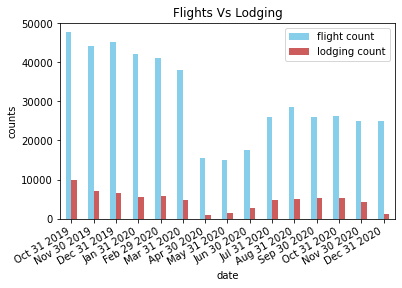

In [57]:
#https://stackoverflow.com/questions/53228762/matplotlib-double-bar-graph-with-pandas-series

ax = merge_df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Flights Vs Lodging")
times = pd.date_range('2019-10', periods=15, freq='1M')
ax.set_xlabel("date")
ax.set_ylabel("counts")
ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.gcf().autofmt_xdate()
plt.show()

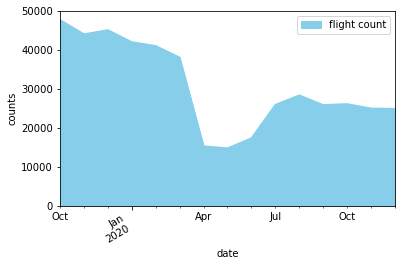

In [71]:
ax = merge_df.plot.area(color=["SkyBlue"],y = 'flight count',rot = 0)
times = pd.date_range('2019-10', periods=15, freq='1M')
plt.gcf().autofmt_xdate()
ax.set_xlabel("date")
ax.set_ylabel("counts")
plt.show()


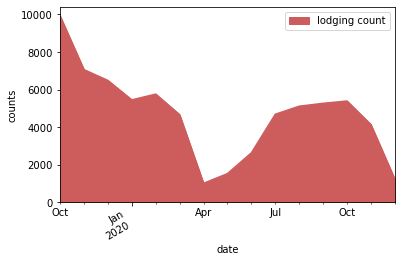

In [72]:
ax = merge_df.plot.area(color=["IndianRed"],y = 'lodging count',rot = 0)
times = pd.date_range('2019-10', periods=15, freq='1M')
plt.gcf().autofmt_xdate()
ax.set_xlabel("date")
ax.set_ylabel("counts")
plt.show()

<AxesSubplot:xlabel='flight count', ylabel='lodging count'>

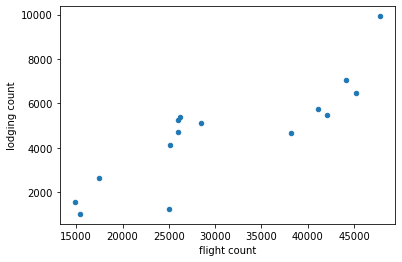

In [14]:
merge_df.plot.scatter(x="flight count", y="lodging count")

In [15]:
origin_grouped = flights_df.groupby(["origin"])
origin_only = origin_grouped["destination"]
origin_df = pd.DataFrame(origin_only.count())
origin_df

,destination
origin,
00GA,1
00NY,1
00WA,1
00WI,2
01FA,36
...,...
XS89,84
YMML,2
YSSY,4


In [16]:
#df[df['date']] < pd.Timestamp(date(2020,1,1))
#date_from = pd.Timestamp(date(2020,1,1))
#date_to = pd.Timestamp(date(2020,1,6))
#df = df[(df['date'] > date_from) & (df['date'] > date_to)]
#group by month
#df['month-year'] = df['date'].map(lambda x: x.strftime('%m/%Y'))
#grouped_df = df.groupby('month-year').size()
#grouped_df

In [17]:
#flights_df["ErrorCheck"] = flights_df["airline"].str.isnumeric()
#flights_df.loc[flights_df["ErrorCheck"] == True]

In [18]:
origin_filtered = origin_df.nlargest(10,"destination")
origin_filtered

,destination
origin,
KLGA,10169
KATL,9536
KMSP,9199
KLAX,8516
KDEN,8247
PANC,7762
KDCA,7408
KPHX,7361
KBOS,7162


<AxesSubplot:xlabel='origin'>

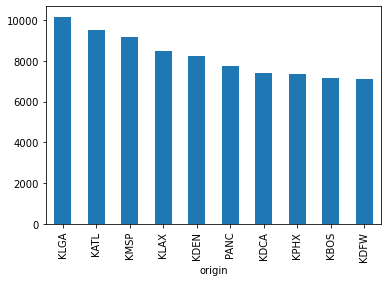

In [19]:
origin_filtered.plot(kind="bar", legend=False)